In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Parameters
num_elements = 8  # Number of antenna elements
d = 0.5  # Distance between elements (in wavelengths)
theta_target = 30  # Target beam direction in degrees (elevation)
phi_target = 60  # Target beam direction in degrees (azimuth)
wavelength = 1  # Wavelength of the signal
k = 2 * np.pi / wavelength  # Wave number

In [3]:
# Define spherical coordinates
theta = np.linspace(0, np.pi, 180)  # Elevation (0 to 180 degrees)
phi = np.linspace(0, 2 * np.pi, 360)  # Azimuth (0 to 360 degrees)
theta_grid, phi_grid = np.meshgrid(theta, phi)

In [4]:
# Convert spherical to Cartesian for 3D plotting
x = np.sin(theta_grid) * np.cos(phi_grid)
y = np.sin(theta_grid) * np.sin(phi_grid)
z = np.cos(theta_grid)

In [5]:
# Beamforming weights
steering_vector = k * d * (np.sin(np.radians(theta_target)) * np.cos(np.radians(phi_target)) * np.arange(num_elements))
weights = np.exp(1j * steering_vector)


In [6]:
# Compute array factor
def array_factor_3d(theta, phi):
    # Expand np.arange(num_elements) to broadcast properly
    element_indices = np.arange(num_elements).reshape(1, 1, -1)  # Shape (1, 1, num_elements)

    # Expand theta and phi to 3D
    theta = theta[:, :, np.newaxis]  # Shape (360, 180, 1)
    phi = phi[:, :, np.newaxis]  # Shape (360, 180, 1)

    # Compute steering matrix
    steering = np.exp(1j * k * d * (np.sin(theta) * np.cos(phi) * element_indices))
    return np.abs(np.sum(steering, axis=2)) / num_elements  # Sum over antenna elements


In [7]:
# Calculate radiation pattern
radiation_pattern = array_factor_3d(theta_grid, phi_grid)

In [8]:
# Normalize the radiation pattern
radiation_pattern = radiation_pattern / np.max(radiation_pattern)

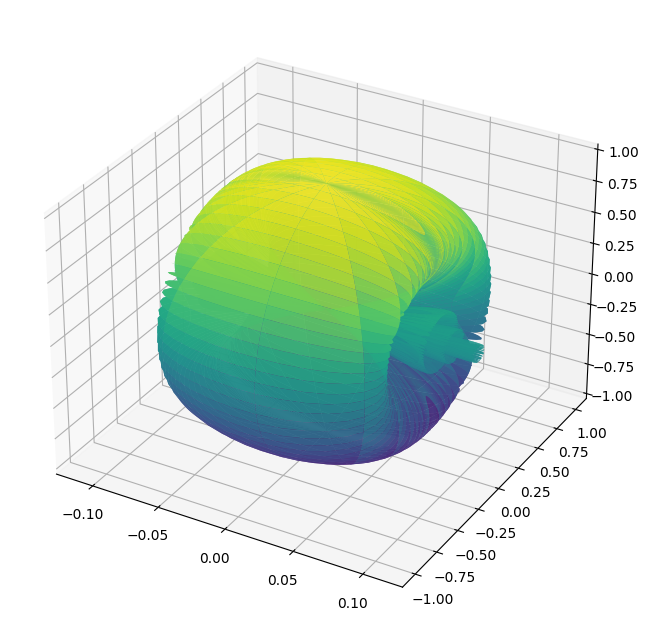

In [9]:
# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(
    x * radiation_pattern,
    y * radiation_pattern,
    z * radiation_pattern,
    rstride=5,
    cstride=5,
    cmap="viridis",
    alpha=0.9,
)

In [10]:
# Set labels with more context
ax.set_title("3D Visualization of 5G Beamforming Radiation Pattern", fontsize=14)
ax.set_xlabel("Horizontal Beam Direction (Azimuth)", fontsize=12)
ax.set_ylabel("Vertical Beam Direction (Elevation)", fontsize=12)
ax.set_zlabel("Normalized Signal Strength", fontsize=12)


Text(0.09669153086224506, 0.012954208804733722, 'Normalized Signal Strength')

In [11]:
import numpy as np
import matplotlib.pyplot as plt


In [12]:
# Parameters
num_elements = 8  # Number of antennas in the array
d = 0.5  # Distance between elements (in wavelengths)
theta_target = 30  # Target angle in degrees
theta_range = np.linspace(-90, 90, 1000)  # Range of angles to evaluate (in degrees)
wavelength = 1  # Wavelength of the signal


In [13]:
# Calculate wave number (k)
k = 2 * np.pi / wavelength

In [14]:
# Beamforming weights for the target angle
phase_shifts = k * d * np.sin(np.radians(theta_target)) * np.arange(num_elements)
weights = np.exp(1j * phase_shifts)


In [15]:
# Array factor calculation
def array_factor(theta):
    theta_rad = np.radians(theta)  # Convert to radians
    steering_vector = np.exp(1j * k * d * np.sin(theta_rad)[:, None] * np.arange(num_elements))
    return np.abs(np.dot(steering_vector, weights)) / num_elements


In [16]:
# Compute array factor over the range of angles
array_response = array_factor(theta_range)


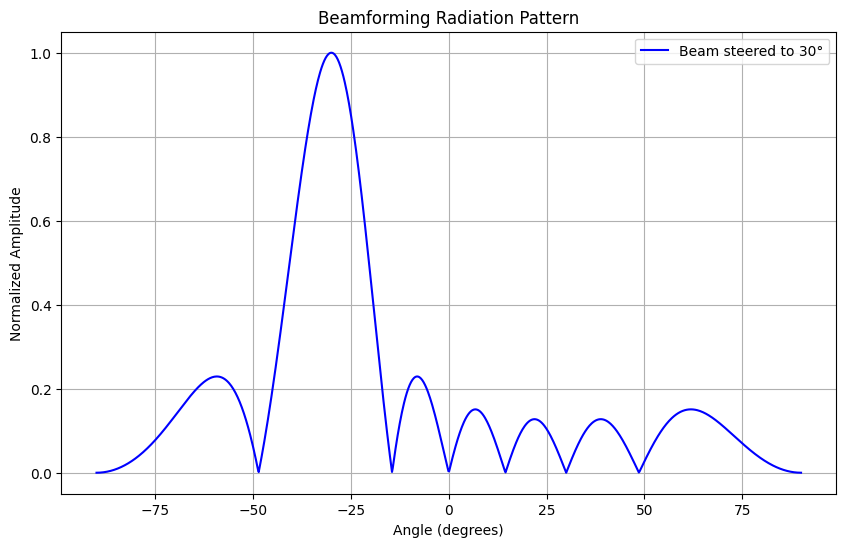

In [17]:
# Plot the array's radiation pattern
plt.figure(figsize=(10, 6))
plt.plot(theta_range, array_response, label=f"Beam steered to {theta_target}°", color='blue')
plt.title("Beamforming Radiation Pattern")
plt.xlabel("Angle (degrees)")
plt.ylabel("Normalized Amplitude")
plt.grid(True)
plt.legend()
plt.show()